## NLP
### Мартынова Галина МАГ ИАД 22   
### Задача:  Классификация текста

### Dataset

Набор данных статей BBC News представляет собой подборку из 2225 новостных статей, опубликованных BBC News и охватывающих различные категории, таких как: спорт, бизнес, политика, технологии и развлечения. Каждая статья сопровождается соответствующей ей меткой категории, что позволяет классифицировать и анализировать новостной контент.

Столбцы набора данных:
1. Категория или тема новостной статьи. Этот набор данных включает пять категорий: спорт, бизнес, политика, технологии и развлечения.
2. Текст: Текстовое содержание новостной статьи, содержащее подробную информацию по теме, затронутой в статье.
https://www.kaggle.com/datasets/moazeldsokyx/bbc-news/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string  

%matplotlib inline

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings 
warnings.filterwarnings('ignore')

C:\Anaconda\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
data = pd.read_csv('D:\Data/bbc-text.csv')

## 1. EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [4]:
data.head(10)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


In [5]:
categories = data['category'].unique() # категории
categories

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [6]:
data.columns = ['category', 'text']

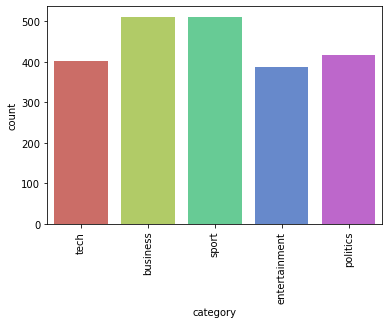

In [7]:
sns.countplot(x = data['category'], data=data, palette='hls') # посмотрим балансировку классов
plt.xticks(rotation=90)
plt.show()

In [8]:
# присвоим категориям метки
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['category'])
y = data['label']

In [9]:
data.head(10)

,category,text,label
0,tech,tv future in the hands of viewers with home th...,4
1,business,worldcom boss left books alone former worldc...,0
2,sport,tigers wary of farrell gamble leicester say ...,3
3,sport,yeading face newcastle in fa cup premiership s...,3
4,entertainment,ocean s twelve raids box office ocean s twelve...,1
5,politics,howard hits back at mongrel jibe michael howar...,2
6,politics,blair prepares to name poll date tony blair is...,2
7,sport,henman hopes ended in dubai third seed tim hen...,3
8,sport,wilkinson fit to face edinburgh england captai...,3
9,entertainment,last star wars not for children the sixth an...,1


Разделим выборку 80/20

In [10]:
train_x = data['text'] 
train_y = data['label']   
train_x = train_x[:1779]                             
train_y = train_y[:1779]

test_x = data['text'] 
test_y = data['label']
test_x = test_x[1780:]                          
test_y = test_y[1780:]

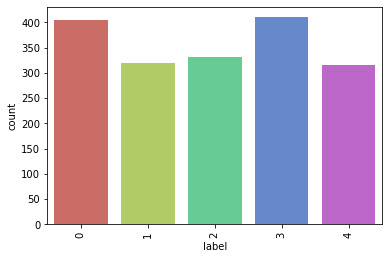

In [11]:
sns.countplot(x = train_y, data=data, palette='hls') # посмотрим балансировку классов после разделения
plt.xticks(rotation=90)
plt.show()

Построим облака слов для каждого класса и проанализируем полученный результат:

(-0.5, 599.5, 399.5, -0.5)

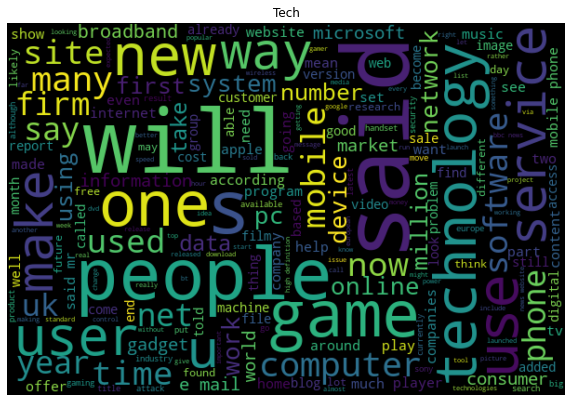

In [12]:
tech = data[data['label']==4]
tech = tech['text']
all_words = ' '.join([word for word in tech])   

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Tech')
plt.axis('off')

(-0.5, 599.5, 399.5, -0.5)

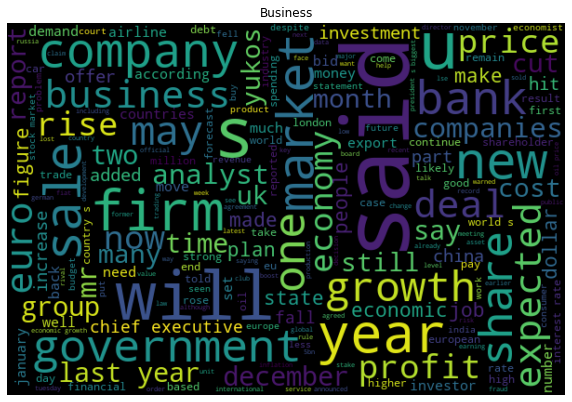

In [13]:
business = data[data['label']==0]
business = business['text']
all_words = ' '.join([word for word in business])   

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Business')
plt.axis('off')

(-0.5, 599.5, 399.5, -0.5)

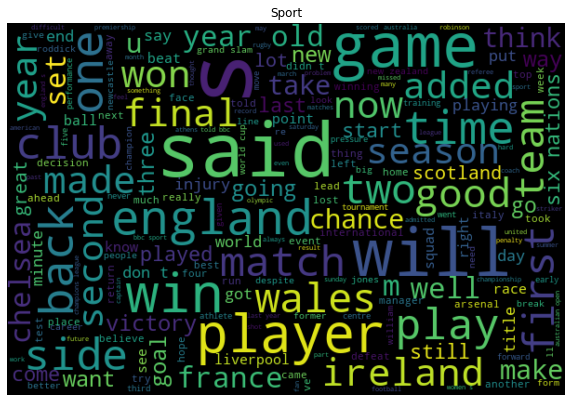

In [14]:
sport = data[data['label']==3]
sport = sport['text']
all_words = ' '.join([word for word in sport])   

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Sport')
plt.axis('off')

(-0.5, 599.5, 399.5, -0.5)

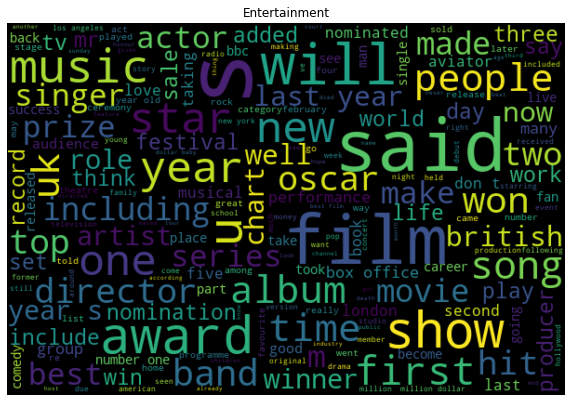

In [15]:
entertainment = data[data['label']==1]
entertainment = entertainment['text']
all_words = ' '.join([word for word in entertainment])   

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Entertainment')
plt.axis('off')

(-0.5, 599.5, 399.5, -0.5)

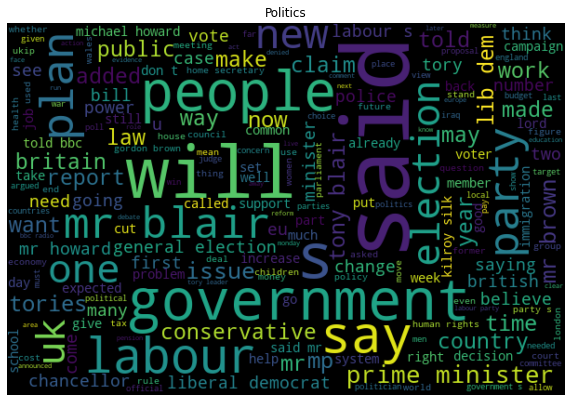

In [16]:
politics = data[data['label']==2]
politics = politics['text']
all_words = ' '.join([word for word in politics])   

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Politics')
plt.axis('off')

Уже на этом этапе можно заметить, что есть "спицифические" слова, присущие только одному классу новостей, например для класса Sport это слова game, match, club. Так же видно, что во всех классах чаще всего повторяется одно и то же слово said. 
Однозначно для проведения анализа необходима предобработка текста.

### Preprocessing


In [17]:
def tokenization(text):  # токенизация
    lst = text.split()
    return lst

train_x = train_x.apply(tokenization)
test_x = test_x.apply(tokenization)

In [18]:
def lowercasing(lst):    # пусть все слова будут в нижнем регистре
    new_lst=[]
    for i in lst:
        i = i.lower()
        new_lst.append(i) 
    return new_lst

train_x = train_x.apply(lowercasing)
test_x = test_x.apply(lowercasing)

In [19]:
def remove_punctuations(lst):       # убираем пунктуацию
    new_lst=[]
    for i in lst:
        for j in string.punctuation:
            i = i.replace(j, '')
        new_lst.append(i)
    return new_lst

train_x = train_x.apply(remove_punctuations) 
test_x = test_x.apply(remove_punctuations)

In [20]:
def remove_numbers(lst):  # убираем цифры
    nodig_lst = []
    new_lst = []

    for i in lst:
        for j in string.digits:
            i = i.replace(j, '')
        nodig_lst.append(i)
    for i in nodig_lst:
        if i != '':
            new_lst.append(i)
    return new_lst

train_x = train_x.apply(remove_numbers)
test_x = test_x.apply(remove_numbers)

In [21]:
def remove_stopwords(lst):              # очистим от стоп-слов
    stop = stopwords.words('english')
    new_lst = []
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

train_x = train_x.apply(remove_stopwords)
test_x = test_x.apply(remove_stopwords)  

### Lemmatization and stemming  
Лемматиза́ция — процесс приведения словоформы к лемме — её нормальной (словарной) форме. Например, в русском языке нормальными формами считаются следующие морфологические формы:  

для существительных — именительный падеж, единственное число;  
для прилагательных — именительный падеж, единственное число, мужской род;  
для глаголов, причастий, деепричастий — глагол в инфинитиве (неопределённой форме) несовершенного вида.  

Сте́мминг (англ. stemming — находить происхождение) — это процесс нахождения основы слова для заданного исходного слова. Основа слова не обязательно совпадает с морфологическим корнем слова.  

https://ru.wikipedia.org/wiki/Лемматизация  
https://ru.wikipedia.org/wiki/Стемминг

In [22]:
#nltk.download('wordnet')

In [23]:
#lemmatizer = WordNetLemmatizer()     
#def lemmatzation(lst):
#    new_lst = []
#    for i in lst:
#        i = lemmatizer.lemmatize(i)
#        new_lst.append(i)
#    return new_lst

#train_x = train_x.apply(lemmatzation)
#test_x = test_x.apply(lemmatzation)

In [24]:
stemmer = SnowballStemmer("english")  

def stemming(lst):
    new_lst = []
    for i in lst:
        i = stemmer.stem(i)
        new_lst.append(i)
    return new_lst

train_x = train_x.apply(stemming)
test_x = test_x.apply(stemming)

## 2. Word Embeding 
### Count-Based Methods: TF-IDF  
TF-IDF (от англ. TF — term frequency, IDF — inverse document frequency) — статистическая мера, используемая для оценки важности слова в контексте документа, являющегося частью коллекции документов или корпуса. Вес некоторого слова пропорционален частоте употребления этого слова в документе и обратно пропорционален частоте употребления слова во всех документах коллекции.  
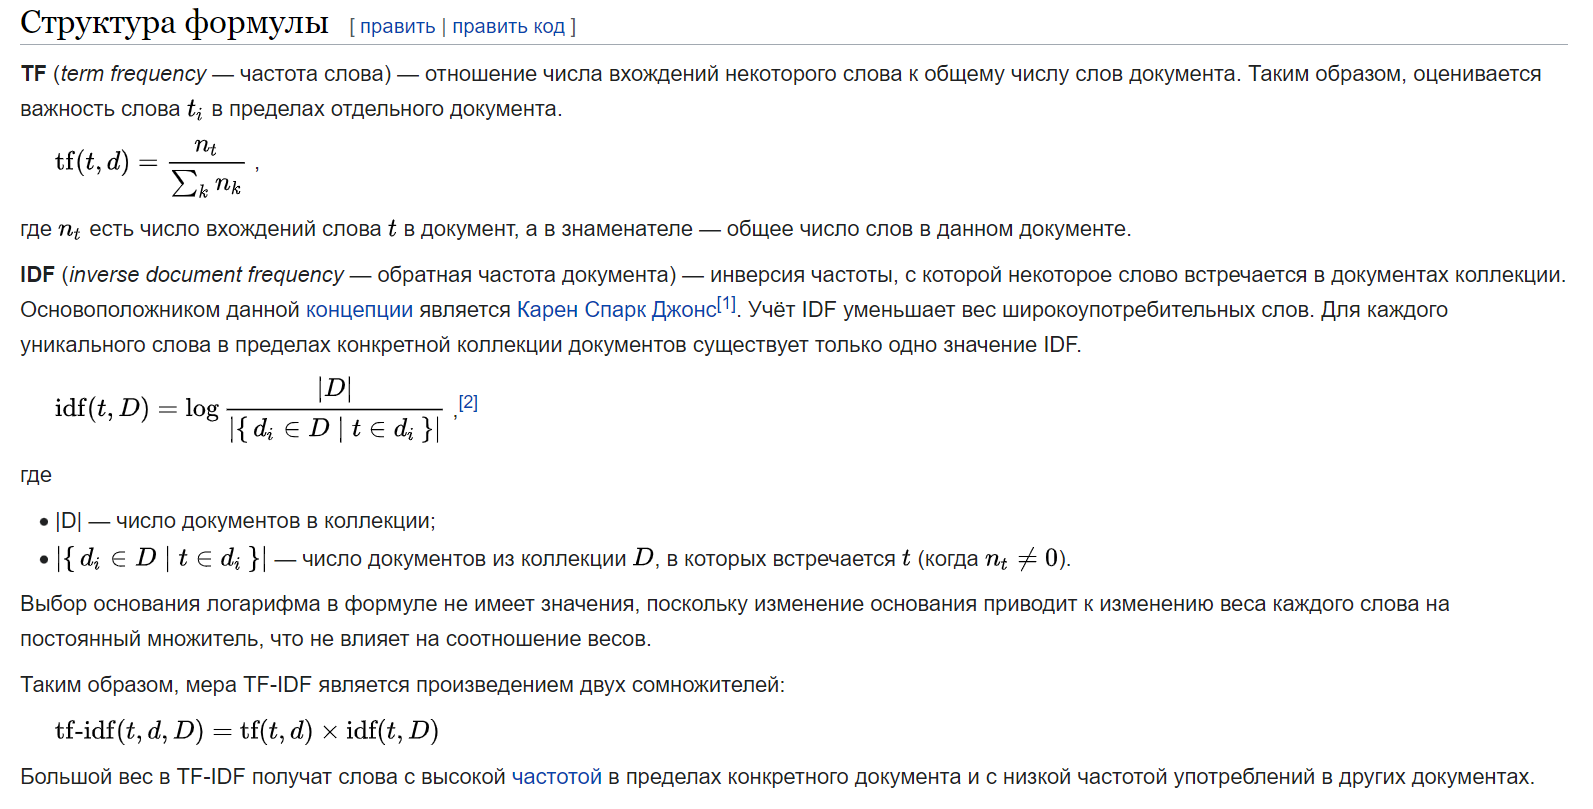

https://ru.wikipedia.org/wiki/TF-IDF

In [25]:
train_x = [" ".join(map(str, lst)) for lst in train_x]
test_x = [" ".join(map(str, lst)) for lst in test_x]

In [26]:
TfIdf = TfidfVectorizer (ngram_range=(1,2), min_df = 3)
# min_df= минимальное кол-во документов, в которых должно встретиться слово, чтобы оно было включено в словарь;
# ngram_range=(1,2) в качестве признаков могут использоваться отдельные слова (униграммы) и пары слов (биграммы)

train_1 = TfIdf.fit_transform(train_x)
test_1 = TfIdf.transform(test_x)

print("Features extracted: ")
print(len(TfIdf.get_feature_names()))
print(TfIdf.get_feature_names()[:100])

Features extracted: 
25542
['aaa', 'aaa champion', 'aaa championship', 'aaa indoor', 'aaa titl', 'aaron', 'abandon', 'abandon plan', 'abat', 'abba', 'abbasi', 'abbasi mr', 'abbott', 'abc', 'aberdeen', 'abid', 'abil', 'abil control', 'abil influenc', 'abil said', 'abl', 'abl access', 'abl choos', 'abl control', 'abl download', 'abl get', 'abl handl', 'abl keep', 'abl make', 'abl play', 'abl sell', 'abl spend', 'abl store', 'abl take', 'abl tell', 'abl use', 'abl watch', 'abl work', 'abn', 'abn amro', 'abolish', 'abort', 'abort drama', 'abortionist', 'abraham', 'abramovich', 'abroad', 'abroad mr', 'abroad us', 'absenc', 'absent', 'absolut', 'absolut noth', 'absorb', 'absurd', 'abund', 'abus', 'ac', 'ac milan', 'academ', 'academi', 'academi award', 'academi film', 'academi motion', 'academi voter', 'acceler', 'acceler lib', 'accept', 'accept new', 'accept offer', 'accept peopl', 'accept widespread', 'access', 'access data', 'access devic', 'access digit', 'access email', 'access film', 'a

### Prediction-Based Method: Word2Vec

In [27]:
# Обучение модели Word2Vec на train_x
#train_sentences = [sentence.split() for sentence in train_x]
#model = Word2Vec(train_sentences, window=5, min_count=1, workers=4)

# Преобразование текстов из train_x и test_x в их векторное представление
#def text_to_vector(text):
    # Для каждого слова в тексте получаем его вектор из модели Word2Vec
#    vectors = [model.wv[word] for word in text.split() if word in model.wv]
#    if vectors:
#        return sum(vectors) / len(vectors)
#    else:
#        return []

#train_1 = [text_to_vector(sentence) for sentence in train_x]
#test_1 = [text_to_vector(sentence) for sentence in test_x]

## 3. Machine Learning 
### Classical ML: SGDClassifier  
— это модель логистической регрессии со стохастическим градиентным спуском (для подсчета градиента ошибки на каждом шаге берется некоторое подмножество от общего количества объектов). За счет этого скорость обучения модели машинного обучения сильно сокращается, а итоговое качество мало отличается от полноценного классификатора.  
Она успешно применяется для решения крупномасштабных и разреженных задач машинного обучения, часто встречающихся при классификации текста и обработке естественного языка. 

In [28]:
SGDClass = SGDClassifier(max_iter = 100, alpha = 1e-6, loss='log', random_state=30)
SGDClass.fit(train_1,train_y)
pred_cl = SGDClass.predict(test_1)
acc_cl = accuracy_score(test_y,pred_cl)
conf_cl = confusion_matrix(test_y,pred_cl)

In [29]:
print('Accuracy: ', acc_cl)
print('Confusion_matrix: \n', conf_cl)

Accuracy:  0.9775280898876404
Confusion_matrix: 
 [[102   0   4   0   0]
 [  1  64   0   0   1]
 [  0   1  83   1   1]
 [  0   0   0 101   0]
 [  0   1   0   0  85]]


In [30]:
f1_cl = f1_score(test_y, pred_cl, average='weighted') 
print('F1 score: ', f1_cl)

F1 score:  0.9775179317321957


### XGBClassifier

In [31]:
XGBCl = XGBClassifier()                    
XGBCl.fit(train_1,train_y)
pred_cl3 = XGBCl.predict(test_1)
acc_cl3 = accuracy_score(test_y,pred_cl3)
conf_cl3 = confusion_matrix(test_y,pred_cl3)

In [32]:
print('Accuracy: ', acc_cl3)
print('Confusion_matrix: \n', conf_cl3)

Accuracy:  0.9595505617977528
Confusion_matrix: 
 [[100   1   3   0   2]
 [  1  64   0   1   0]
 [  3   0  80   0   3]
 [  2   0   0  99   0]
 [  1   1   0   0  84]]


In [33]:
f1_cl3 = f1_score(test_y, pred_cl3, average='weighted') 
print('F1 score: ', f1_cl3)

F1 score:  0.9595576900866358


### MultinomialNB

In [34]:
MultNB = MultinomialNB()
MultNB.fit(train_1,train_y)
pred_cl2 = MultNB.predict(test_1)
acc_cl2 = accuracy_score(test_y,pred_cl2)
conf_cl2 = confusion_matrix(test_y,pred_cl2)

In [35]:
print('Accuracy: ', acc_cl2)
print('Confusion_matrix: \n', conf_cl2)

Accuracy:  0.9730337078651685
Confusion_matrix: 
 [[103   0   2   0   1]
 [  4  61   1   0   0]
 [  0   0  84   1   1]
 [  0   0   0 101   0]
 [  2   0   0   0  84]]


In [36]:
f1_cl2 = f1_score(test_y, pred_cl2, average='weighted') 
print('F1 score: ', f1_cl2)

F1 score:  0.972991639150704


### Neural network

In [37]:
# Векторизация текста
vectorizer = TfidfVectorizer()
train_x = vectorizer.fit_transform(train_x).toarray()
test_x = vectorizer.transform(test_x).toarray()

# Создание модели нейронной сети
model = Sequential()
model.add(Dense(64, input_dim=train_x.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Компиляция модели
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
model.fit(train_x, train_y, epochs=10, batch_size=32)

# Оценка модели на тестовых данных
loss, accuracy = model.evaluate(test_x, test_y)
print("Accuracy on test data: {:.2f}".format(accuracy))

Epoch 1/10
56/56 [==============================] - 1s 12ms/step - loss: 1.3630 - accuracy: 0.7690
Epoch 2/10
56/56 [==============================] - 1s 13ms/step - loss: 0.4097 - accuracy: 0.9910
Epoch 3/10
56/56 [==============================] - 1s 14ms/step - loss: 0.0488 - accuracy: 0.9989
Epoch 4/10
56/56 [==============================] - 1s 13ms/step - loss: 0.0135 - accuracy: 1.0000
Epoch 5/10
56/56 [==============================] - 1s 13ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 6/10
56/56 [==============================] - 1s 13ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 7/10
56/56 [==============================] - 1s 13ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 8/10
56/56 [==============================] - 1s 13ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 9/10
56/56 [==============================] - 1s 13ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 10/10
14/14 [==============================] - 0s 2ms/step - loss: 0.0657 - accuracy: 0.9820
Accuracy o

# Выводы: 
В ходе выполнения работы по классификации текста были получены следующие результаты:
1) Лемматизация в сочетании с методом TFIDF показала следующие результаты: SGDCl Accuracy 0.9775, XGBCl 0.9640, MultNB 0.9730. Те же модели в сочетании со стеммингом показали аналогичные результаты:   SGDCl Accuracy 0.9797, XGBCl 0.9595, MultNB 0.9730  

2) Лемматизация в сочетании с методом Word2vec показала следующие результаты: SGDCl Accuracy 0.9033, XGBCl 0.9303, MultNB -. Что значительно хуже. Те же модели в сочетании со стеммингом показали так же худшие результаты:   SGDCl Accuracy 0.8943, XGBCl 0.9438, MultNB -. (MultNB работать с Word2vec отказался, сославшись на неверную размерность)  

  Можно сделапть вывод, что для обработки данного текста более подходящим является метод TFIDF. Далее была выполнена настройка параметров модели TFIDF, таких как min_df (минимальное кол-во документов, в которых должно встретиться слово, чтобы оно было включено в словарь) и ngram_range ((1,2) в качестве признаков могут использоваться отдельные слова (униграммы) и пары слов (биграммы)). Это помогло улучшить метрики на 0,05-0,1 пунктов.  
  
3) Удаление наиболее часто встречающегося слова said на результат не повлияло, возможно потому, что оно практически одинаково встречалось во всех классах.
 
4) Нейросеть совместно с TFIDF показала результат:  Accuracy on test data: 0.98